#**Tutorial # 3 : A Zero-Dimensional Energy Balance Model**


**Week 1, Day 5, Climate Modeling**

**Content creators:** Jenna Pearson, Brodie Pearson, and Abigail Bodner

**Content reviewers:** Draco Xu

**Content editors:** TBD

**Production editors:** TBD

**Our 2023 Sponsors:** TBD

#**Tutorial Objectives**

In this tutorial students will learn about the heat capacity of the atmosphere and oceans, how this related to temperature changes over time, and set up their first climate model.

By the end of this tutorial students will be able to:
* Calculate the heat capacity of the ocean and atmospehre.
* Create and run a time-dependent model of the change in global mean surfact temperture.
* Describe the influence of transmissivity and albedo on the equilibrium temperature from this model.

# Setup

## Package Imports

In [ ]:
import xarray as xr                     # used to manipulate data and open datasets
import numpy as np                      # used for algeba and array operations
import matplotlib.pyplot as plt         # used for plotting

## Figure Settings

In [ ]:
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

# Section 1 : Heat Capacity

One of the crucial things missing from the simple model we have looked at so far is it's ability to change with time. As the composition of the atmosphere (among other things) changes with time, in response, so does the energy balance and global mean surface temperature. 

We can represent the change in temperature over time as the net heat input or loss from radiation ($ASR-OLR$) multiplied by the heat capacity of the Earth system.

The heat capacity of a medium is it's ability to increase in temperture given an input of heat. Not all components of the Earth system (for example land, ocean, atmosphere) have the same heat capacity.

Mathematically the rate of change of global mean surface temperature ($T$) over time is given as

\begin{align}
\text{rate of change of }T = \frac{1}{\text{heat capacity}}\cdot (\text{energy flux in - energy flux out}) = \frac{1}{C} \cdot ASR - OLR
\end{align}

where $C$ is the heat capacity of the Earth system. Note here that when $ASR > OLR$, then the system is gaining heat. Conversly when $ASR < OLR$, then the system is losing heat over time.

To calculate the heat capacity for the Earth system, we will assume the it is a combination of atmophere and ocean only, that is $C = C_{oc} + C_{atmo}$. 

Generally, the heat capacity of a medium is the specific heat of that medium times the total mass.

For the atmosphere we have $C_{atm} = c_{atm} \cdot \frac{W_{atm}}{g} $ where $c_{atm}$ is the specific heat of the atmosphere, $W_{atm}$ is the weight of a column of air, and $g$ is the acceleration due to gravity.

For the ocean we have $C_{oc} = c_{oc} \cdot \rho_{oc} \cdot d_{oc}$ where $c_{oc}$ is the specific heat of the ocean, $\rho_{oc}$ is the density of seawater, and $d_{oc}$ is a representive depth of the ocean. 

We will use this definition to find the heat capactities of the atmosphere and ocean.

In [ ]:
# heat capacity of the ocean
c_oc = 3850                       #  specific heat of seawater in J/kg/K
rho_oc = 1025                     #  average density of seawater in kg/m3
d_oc = 70                         #  depth of water in m (here representative of the mized layer)
C_oc = c_oc * rho_oc * d_oc       #  heat capacity of the ocean

# heat capacity of the atmosphere
c_atm = 1004                       #  specific heat of the atmosphere at constant pressure in J/kg/K
W_atm = 100000                     #  weight (pressure) of atmospheric column in Pa
g = 9.81                           #  acceleration due to gravity in m/s^2
C_atm = c_atm * (W_atm / g)        #  heat capacity of the atmosphere

# total heat capacity
C = C_oc + C_atm

#print results.

print('Ocean Heat Capactiy:      ', C_oc,' J m^-2K^-2')
print('Atmosphere Heat Capacity: ', C_atm,'   J m^-2K^-2')
print('Total Heat Capactiy:      ', C,' J m^-2K^-2')

Ocean Heat Capactiy:       276237500  J m^-2K^-2
Atmosphere Heat Capacity:  10234454.638124362    J m^-2K^-2
Total Heat Capactiy:       286471954.63812435  J m^-2K^-2


## Questions

1.  Does the ocean or atmosphere have a higher heat capacity?
2.  For an equivalent heat input, will the ocean or atmosphere warm more?
3. What do you think this means for warming of the climate system?

## Coding Exercises

1.  Calculate the depth of the ocean needed for the ocean to have the same heat capacity at the atmosphere.

In [ ]:
# heat capacity of the atmosphere
c_atm = 1004                       #  specific heat of the atmosphere at constant pressure in J/kg/K
W_atm = 100000                     #  weight (pressure) of atmospheric column in Pa
g = 9.81                           #  height of atmosphere in m (representative of )
C_atm = c_atm * (W_atm / g)        #  heat capacity of the atmosphere

# find the depth of the ocean for equivalent atmospheric heat capacity
c_oc = 3850                       #  specific heat of seawater in J/kg/K
rho_oc = 1025                     #  average density of seawater in kg/m3

d_oc  = ...
d_oc 

Ellipsis

In [ ]:
# to_remove solution

# heat capacity of the atmosphere
c_atm = 1004                       #  specific heat of the atmosphere at constant pressure in J/kg/K
W_atm = 100000                     #  weight (pressure) of atmospheric column in Pa
g = 9.81                           #  height of atmosphere in m (representative of )
C_atm = c_atm * (W_atm / g)        #  heat capacity of the atmosphere

# find the depth of the ocean for equivalent atmospheric heat capacity
c_oc = 3850                       #  specific heat of seawater in J/kg/K
rho_oc = 1025                     #  average density of seawater in kg/m3

d_oc  = C_atm/(c_oc * rho_oc)      #  heat capacity of the ocean
d_oc 

2.5934633229330024

# Section 2 : Add Time Dependency to the Model

Knowing the heat capacity, and the descriptions of $OLR$ and $ASR$ from previous tutorials, we can write the equation

\begin{align}
\text{rate of change }T = \frac{\text{change in }T}{\text{change in time}}=\frac{dT}{dt}= \frac{1}{C}(ASR - OLR)
\end{align}

Numerically, we can use this equation to compute the global mean surface temprature after a small interval of time by adding on the amount of energy gained or lost multiplied by the time interval itself. 

The particular method of numerically defining the time and temperature intervals (changes) is called **discretization**, and the way we have chosen to do this is called the **Euler method**.The exact details of this method are beyond the scope of this tutorial, and we will use the method without further elaboration.

The Euler method assumes we can use $\text{change in }T = T_{n+1} - T_{n}$ and $\text{change in t} = t_{n+1} - t_{n}$ where $t$ is time. Thus, if we know the time interval and the current temperature ($T_n$), we can predict the temperature at the end of our time interval, ($T_{n+1}$).

In [ ]:
# define albedo
alpha = 0.2941 # unitless number between 0 and 1 (calculated previously from observations in tutorial 2)

# define transmissivity (calculated previously from observations in tutorial 1)
tau = 0.6127 # unitless number between 0 and 1

# create a function to find the new tempeature based on the previous using Euler's method.
def step_forward(T,alpha,tau):

    # define the observed insolation based on observations from the IPCC AR6 Figure 7.2
    Q = 340 # W m^-2

    # define the Stefan-Boltzmann Constant, noting we are using 'e' for scientific notation
    sigma = 5.67e-8 # W m^-2 K^-4

    ASR = (1-alpha)*Q
    OLR = tau * sigma * T**4

    T_new = T + dt / C * ( ASR - OLR )

    return T_new

We can now use a loop to apply this function many times over by specifying an initial temperature and a time interval. 

In [ ]:
# define the time interval, one year expressed in seconds
dt = 60. * 60. * 24. * 365.

# define the number of timesteps (years) to run the model
numtsteps = 15   

# for converting number of seconds in a year
sec_2_yr = 3.154e7

# define empty arrays to store the time series of temperature and the corresponding years
T_series = np.zeros((numtsteps+1))
t_series = np.zeros((numtsteps+1))

# define the intial temperature
T_series[0] = 288. 

# run the model
for n in range(numtsteps):
    t_series[n+1] = (n+1)*dt/sec_2_yr
    T_series[n+1] = step_forward( T_series[n], alpha = alpha, tau = tau )

# display the temeprature time series
print(T_series)

[288.         288.11056348 288.18070153 288.2251708  288.25335571
 288.27121559 288.28253125 288.2897     288.29424133 288.29711811
 288.29894042 288.30009475 288.30082594 288.30128911 288.30158249
 288.30176833]


In [ ]:
print(t_series)

[ 0.          0.99987318  1.99974635  2.99961953  3.99949271  4.99936588
  5.99923906  6.99911224  7.99898542  8.99885859  9.99873177 10.99860495
 11.99847812 12.9983513  13.99822448 14.99809765]


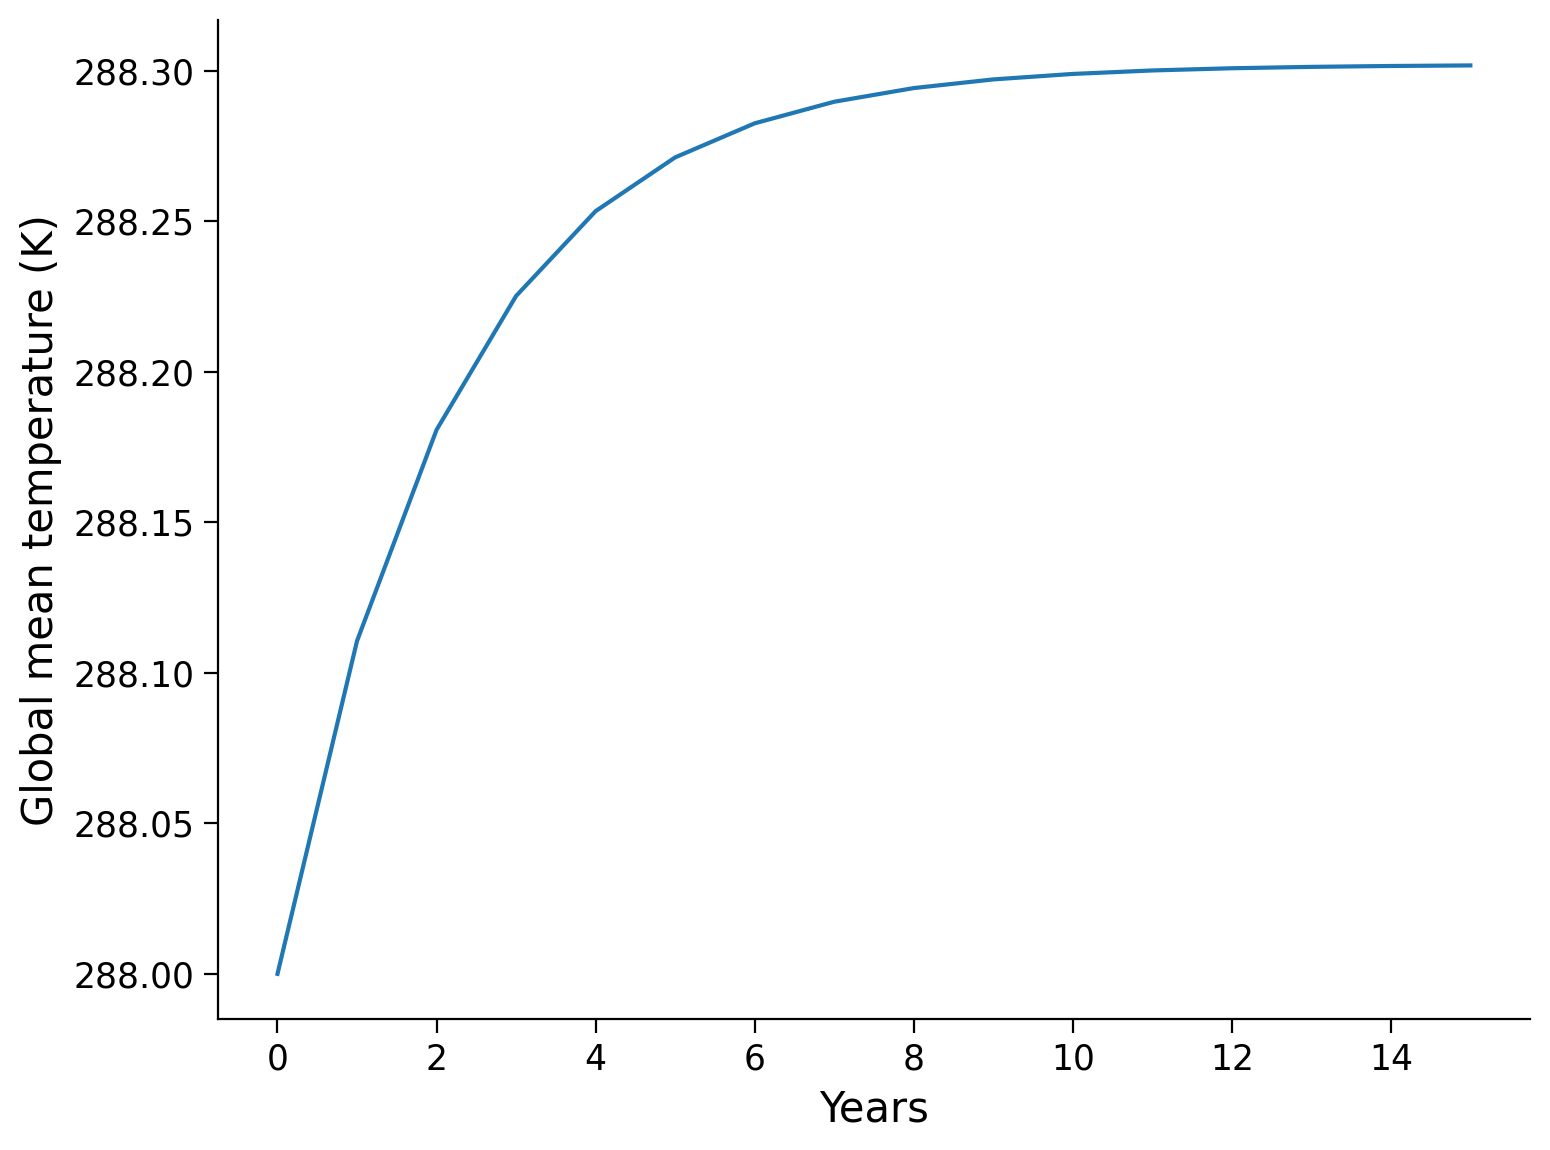

In [ ]:
# plot the results
plt.plot(t_series, T_series)
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)');

## Questions

1. What impact do you think the time interval ($dt$) has on the accuracy of the model results?
2. Do you think a smaller or larger time interval than one year would provide more accurate results?

## Coding Exercises

1.  Using a for loop, run the model for 200 years with two different three intervals ($dt$) of a half year, 1 year and 5 years and plot the results.

In [ ]:
# # one year expressed in seconds
# one_yr = 60. * 60. * 24. * 365. 

# # legend labels
# labels = ['dt = half-year','dt = one year','dt = five years']

# # define the number of timesteps (years) to run the model
# numtsteps = np.array([10,5,1])*3

#  # for converting number of seconds in a year
# sec_2_yr = 3.154e7

# # loop through each choice of time step
# for dd,dt ...

#   # define empty arrays to store the time series of temperature and the corresponding years
#   T_series = np.zeros((numtsteps[dd]+1))
#   t_series = np.zeros((numtsteps[dd]+1))

#   # define the intial temperature
#   T_series[0] = 288. 

#   # run the model
#   for n in range(numtsteps[dd]):
#       t_series[n+1] = (n+1)*dt/sec_2_yr
#       T_series[n+1] = step_forward( T_series[n], alpha = alpha, tau = tau )

#   plt.plot(t_series, T_series, label = labels[dd])

# plt.xlabel('Years')
# plt.ylabel('Global mean temperature (K)');
# plt.legend()
    

SyntaxError: ignored

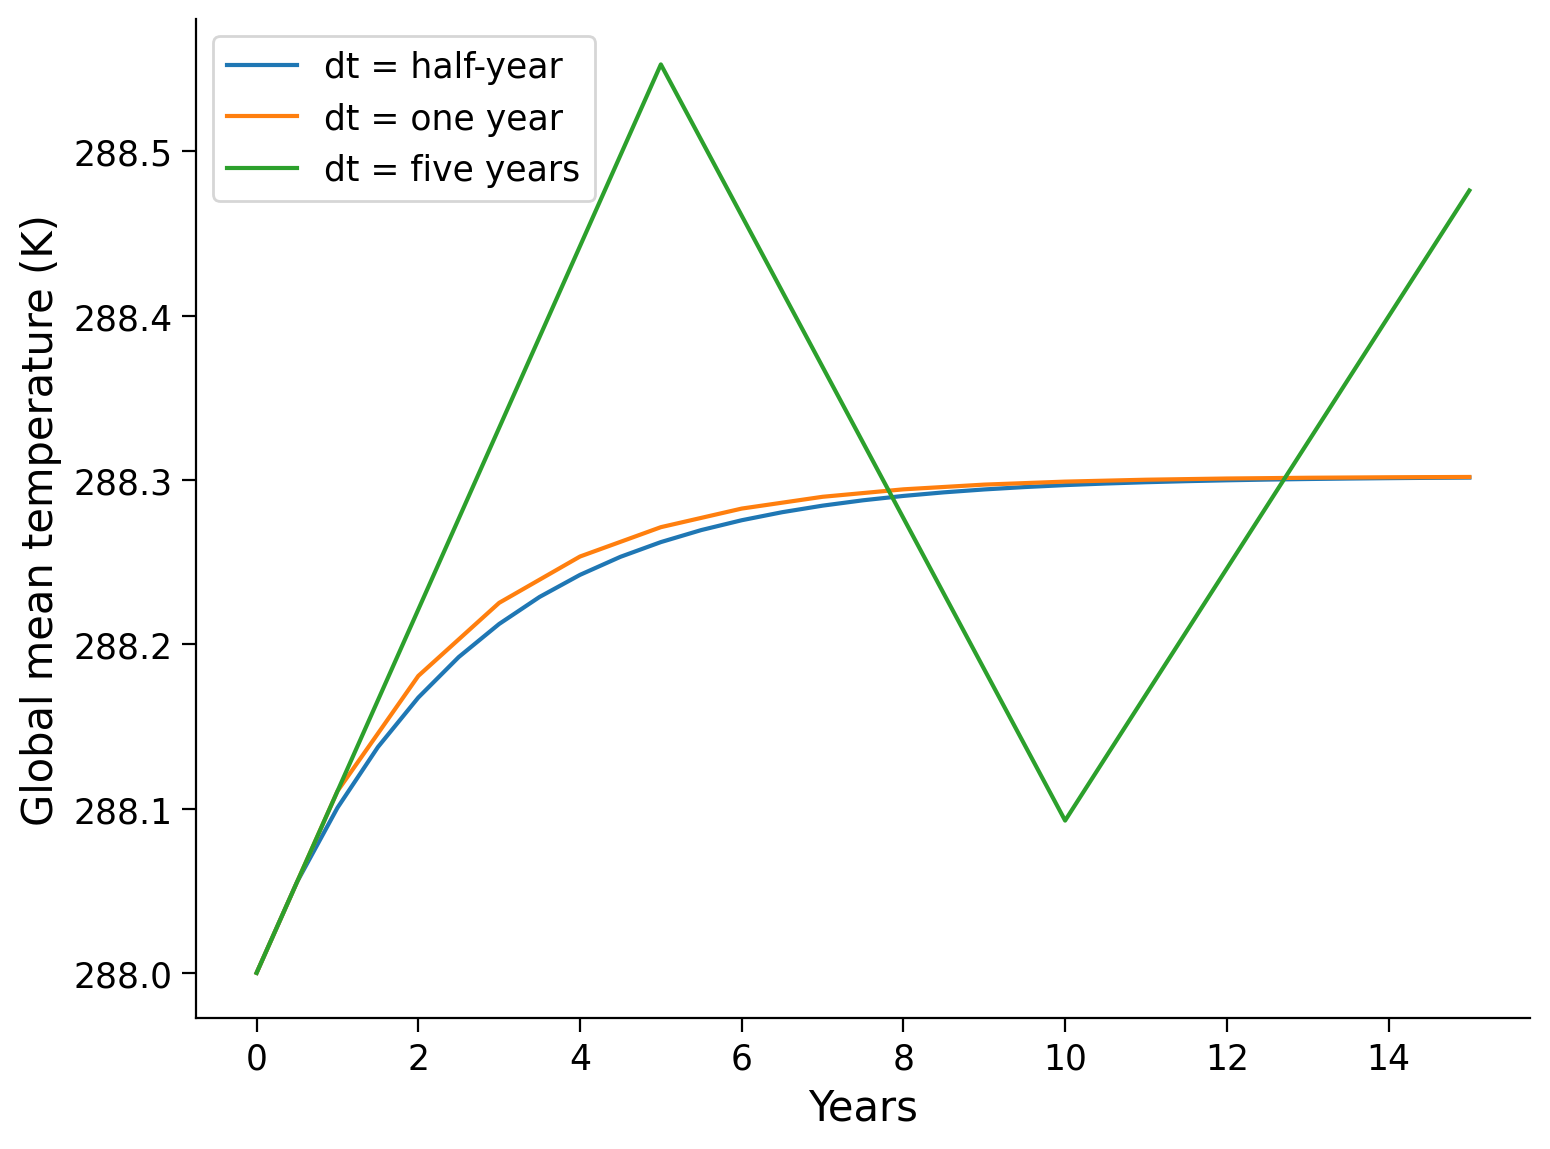

In [ ]:
# to_remove solution

# one year expressed in seconds
one_yr = 60. * 60. * 24. * 365. 

# legend labels
labels = ['dt = half-year','dt = one year','dt = five years']

# define the number of timesteps (years) to run the model
numtsteps = np.array([10,5,1])*3

 # for converting number of seconds in a year
sec_2_yr = 3.154e7

# loop through each choice of time step
for dd,dt in enumerate([one_yr*0.5,one_yr,one_yr*5]):

  # define empty arrays to store the time series of temperature and the corresponding years
  T_series = np.zeros((numtsteps[dd]+1))
  t_series = np.zeros((numtsteps[dd]+1))

  # define the intial temperature
  T_series[0] = 288. 

  # run the model
  for n in range(numtsteps[dd]):
      t_series[n+1] = (n+1)*dt/sec_2_yr
      T_series[n+1] = step_forward( T_series[n], alpha = alpha, tau = tau )

  plt.plot(t_series, T_series, label = labels[dd])

plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)');
plt.legend()
    

# Section 3 : Revisiting the Climate Change Scenario from Tutorial 2

In tutorial 2 we looked at how changing the transmissivity ($\tau$) affected the equilibrium temperature. Now we can use our time-dependent model to investigate this more fully. Reuse the model, this time setting $\tau=0.57$

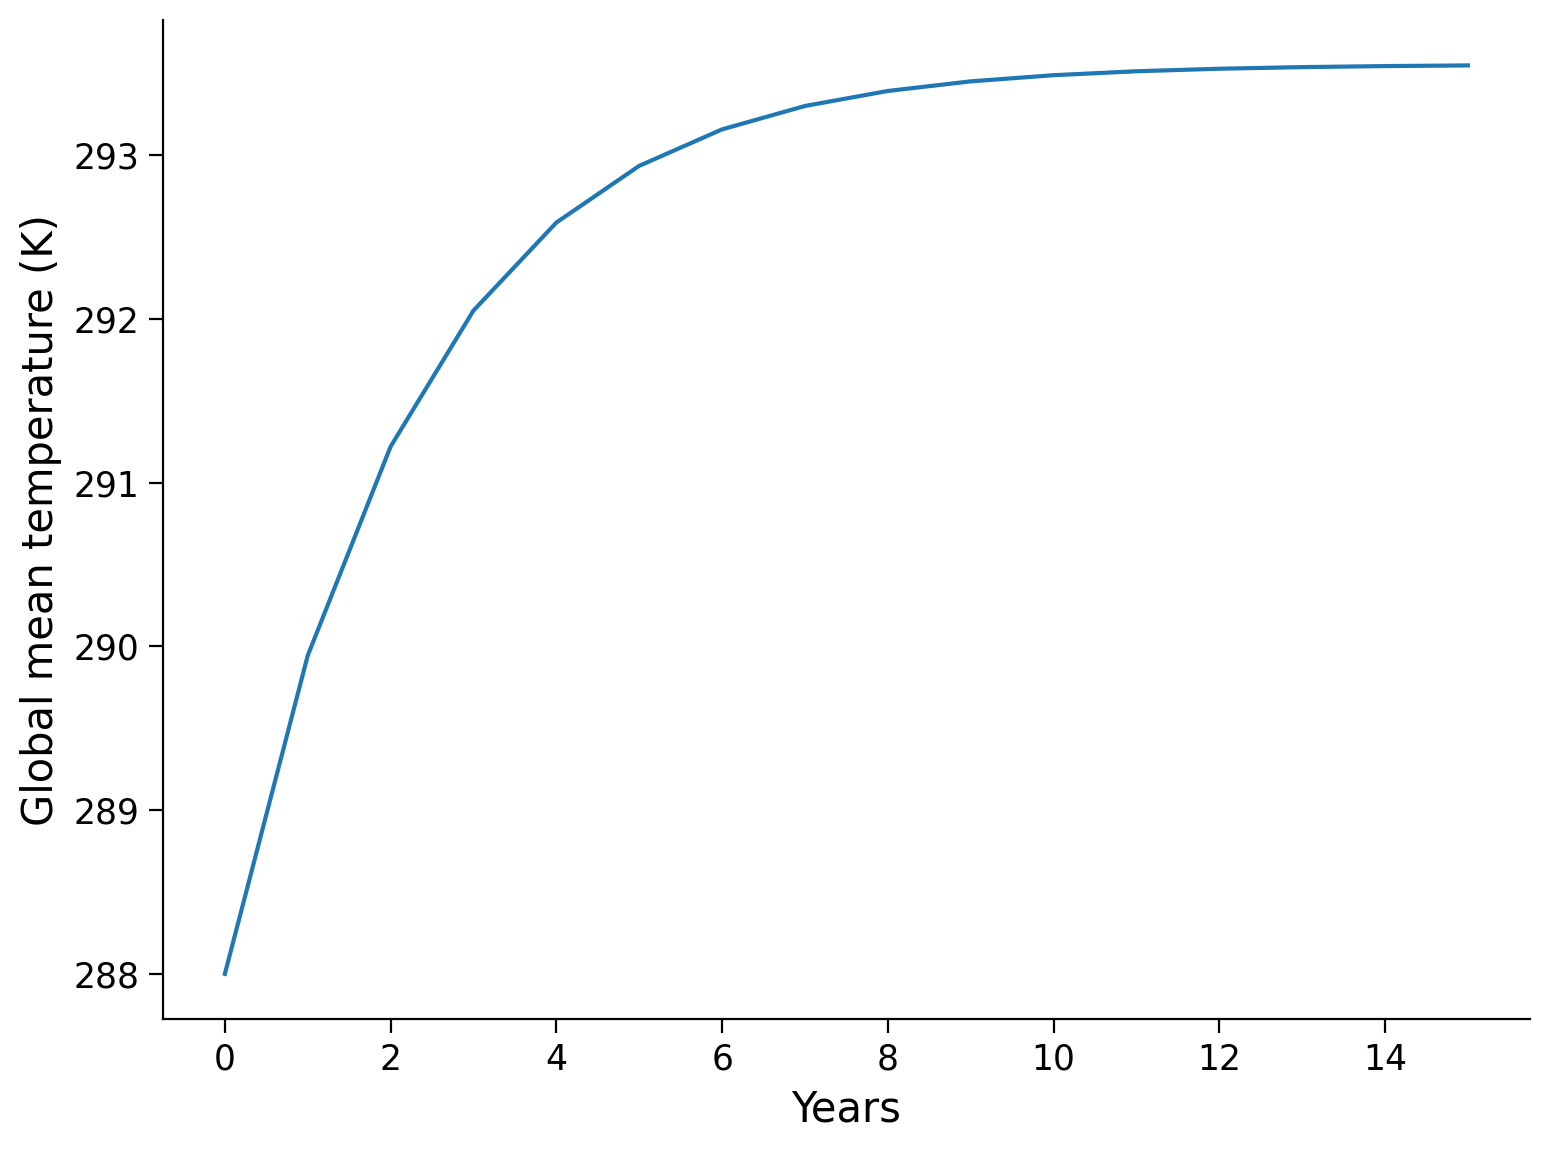

In [ ]:
# define albedo
alpha = 0.2941 # unitless number between 0 and 1 (calculated previously from observations in tutorial 2)

# define transmissivity (calculated previously from observations)
tau = 0.57 # unitless number between 0 and 1

# define the time interval, one year expressed in seconds
dt = 60. * 60. * 24. * 365.

# define the number of timesteps (years) to run the model
numtsteps = 15   

# for converting number of seconds in a year
sec_2_yr = 3.154e7

# define empty arrays to store the time series of temperature and the corresponding years
T_series = np.zeros((numtsteps+1))
t_series = np.zeros((numtsteps+1))

# define the intial temperature
T_series[0] = 288. 

# run the model
for n in range(numtsteps):
    t_series[n+1] = (n+1)*dt/sec_2_yr
    T_series[n+1] = step_forward( T_series[n], alpha = alpha, tau = tau )

plt.plot(t_series, T_series)

plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)');
    

## Questions

1.  How does the long-term temperature here compare to the value you found from tutorial 2?


## Coding Exercises

1. Run the model again keeping the original $\tau=0.6114$ but now change $\alpha=0.2$.

In [ ]:
#insert code



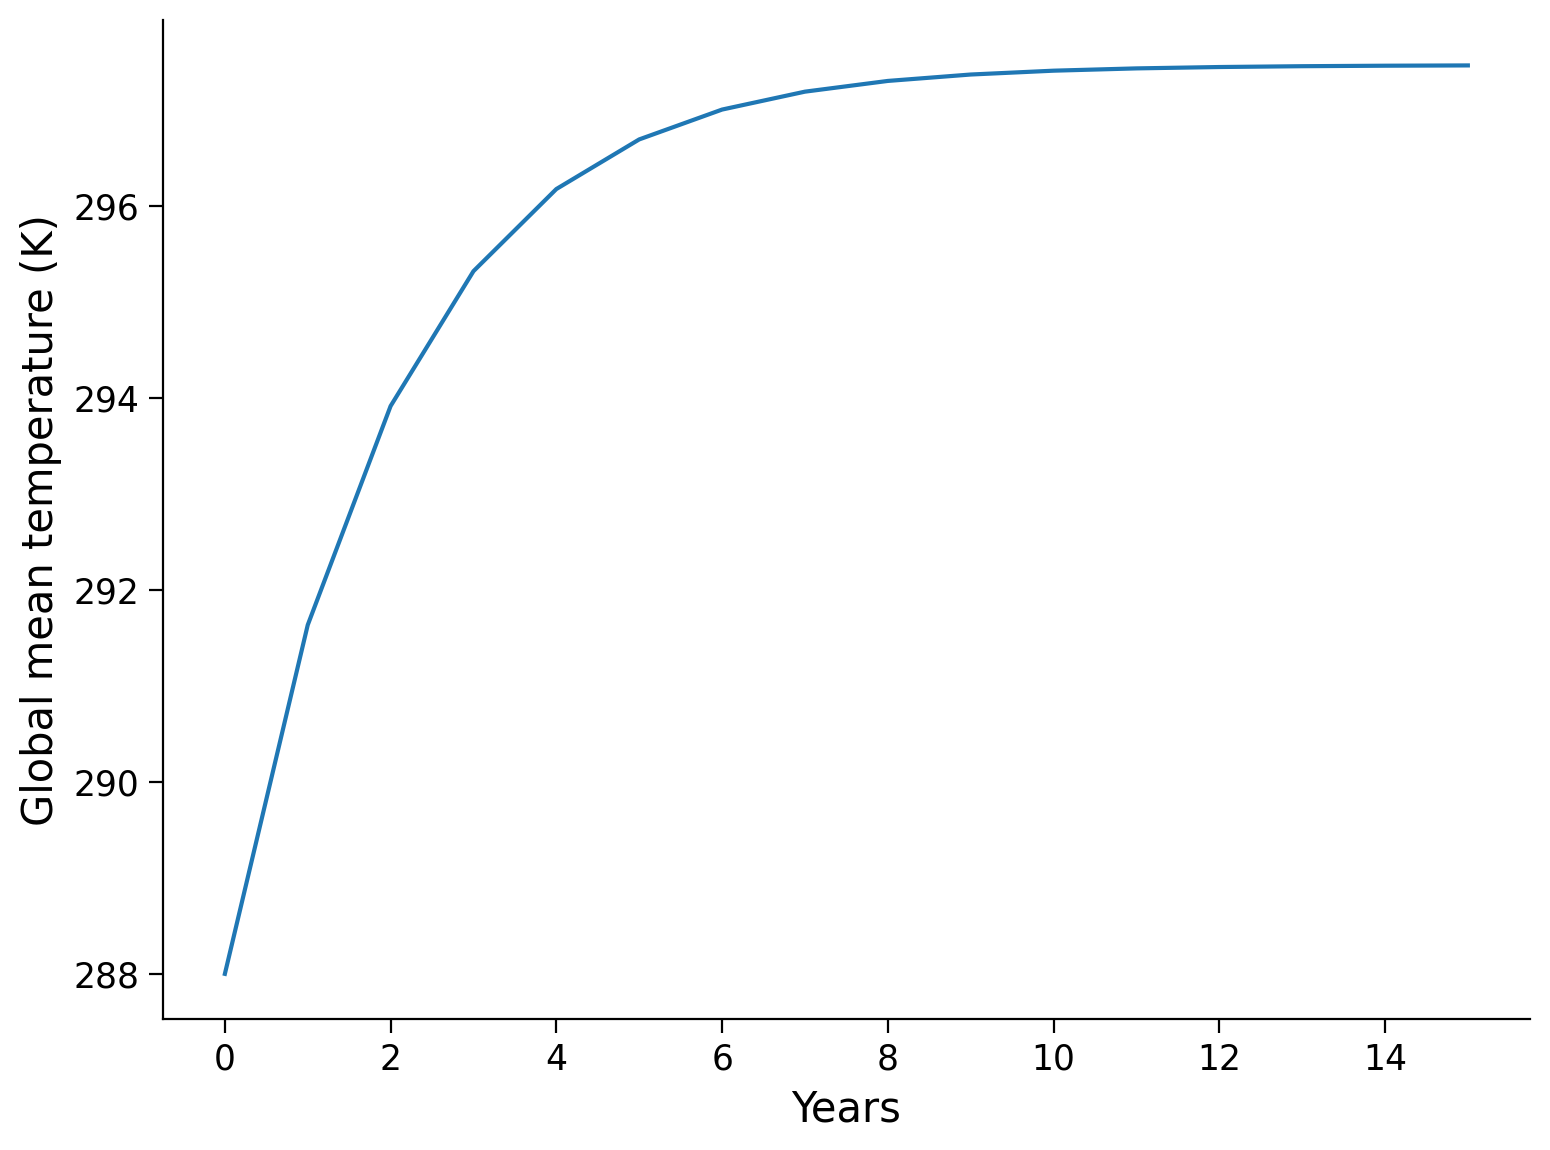

In [ ]:
#to_remove solution

# define albedo
alpha = 0.2 # unitless number 

# define transmissivity (calculated previously from observations in tutorial 1)
tau = 0.6127 # unitless number between 0 and 1

# define the time interval, one year expressed in seconds
dt = 60. * 60. * 24. * 365.

# define the number of timesteps (years) to run the model
numtsteps = 15   

# for converting number of seconds in a year
sec_2_yr = 3.154e7

# define empty arrays to store the time series of temperature and the corresponding years
T_series = np.zeros((numtsteps+1))
t_series = np.zeros((numtsteps+1))

# define the intial temperature
T_series[0] = 288. 

# run the model
for n in range(numtsteps):
    t_series[n+1] = (n+1)*dt/sec_2_yr
    T_series[n+1] = step_forward( T_series[n], alpha = alpha, tau = tau )

plt.plot(t_series, T_series)

plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)');
    